In [1]:
using PyPlot, Random

In [27]:
nt = 200  # タイムステップ数
time = 1:nt # 時間配列
μ = sin.(range(0, 3π, length=nt)) # 真の平均
x = μ .+ randn(nt) .* 0.3 # 観測値

# 推定値の配列（通常平均とEMA）
μ_avg, μ_ema = zeros(nt), zeros(nt)

# 初期値の設定
μ_avg[1] = μ_ema[1] = x[1]

# 推定値の更新
α = 0.05
for t in 2:nt
    μ_avg[t] = μ_avg[t-1] + (1/ t) * (x[t] - μ_avg[t-1]) 
    μ_ema[t] = μ_ema[t-1] + alpha * (x[t] - μ_ema[t-1])
end

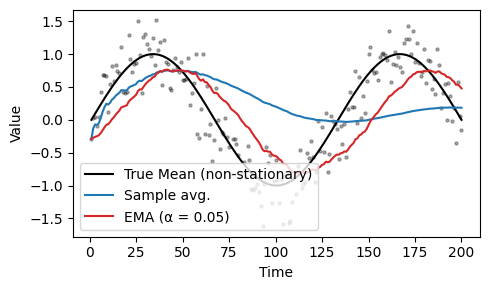

In [34]:
figure(figsize=(5,3))
scatter(time, x, color="k", alpha=0.3, s=5)
plot(time, μ, color="k", label="True Mean (non-stationary)")
plot(time, μ_avg, color="tab:blue", label="Sample avg.")
plot(time, μ_ema, color="tab:red", label="EMA (α = $(α))")
xlabel("Time"); ylabel("Value")
legend()
tight_layout()